In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Data Collection
df = pd.read_csv('hearts.csv')    #to read the file
##print(df)



##Data Preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

print(df)




x=df.drop(columns=['HeartDisease'])  #Input

y=df['HeartDisease']      #Output

print("XXXX",x)
print("YYYY",y)




from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)   #split the val


#X_train  - 80% input data
#Y_train  - 80% output data
#X_test   - 20% input data
#Y_test   - 20% output data 

print("DF",df.shape)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)



##Model Training

from sklearn.naive_bayes import GaussianNB  
NB = GaussianNB()

NB.fit(x_train, y_train)


###Model Evaluation

y_pred=NB.predict(x_test)

print("y_pred",y_pred)
print("y_test",y_test)



from sklearn.metrics import accuracy_score
print('ACCURACY is', accuracy_score(y_test,y_pred))



#Model Prediction

testPrediction = NB.predict([[29,0,2,100,106,1,2,80,1,1,1]])
if testPrediction==1:
    print("The Patient Have Heart Disease,please consult the Doctor")
else:
    print("The Patient Normal")







##from sklearn.metrics import confusion_matrix
##from sklearn.metrics import precision_score, recall_score, f1_score ,confusion_matrix
##cm = confusion_matrix(y_test, y_pred)
##print("Confusion Matrix:")
##print(cm)
##
### Calculate precision
##precision = precision_score(y_test, y_pred)
##print("Precision:", precision)
##
### Calculate recall
##recall = recall_score(y_test, y_pred)
##print("Recall:", recall)
##
### Calculate F1 score
##f1 = f1_score(y_test, y_pred)
##print("F1 Score:", f1)
##

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Hear

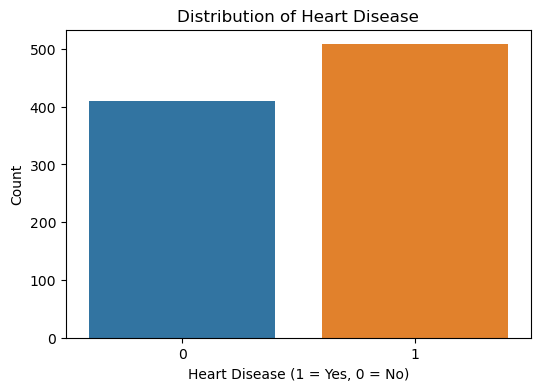

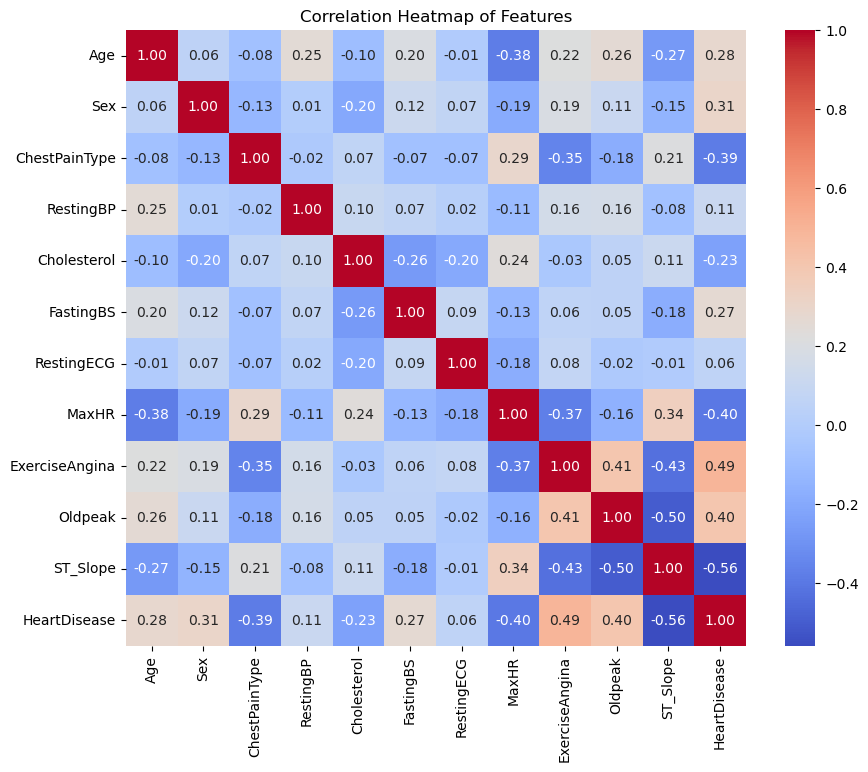

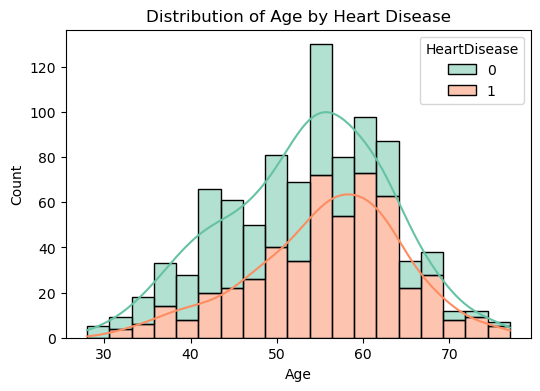

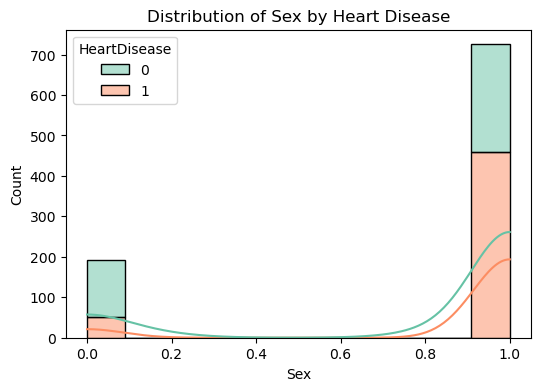

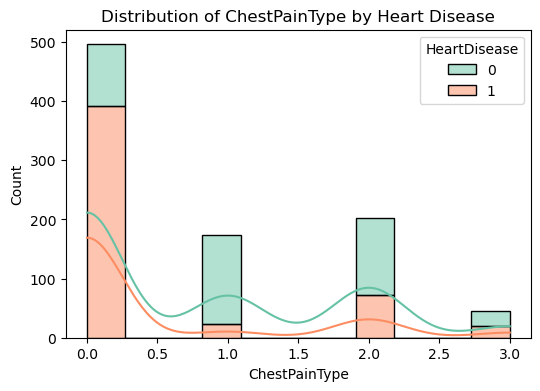

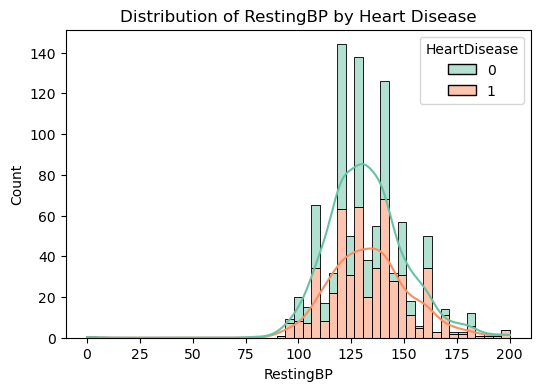

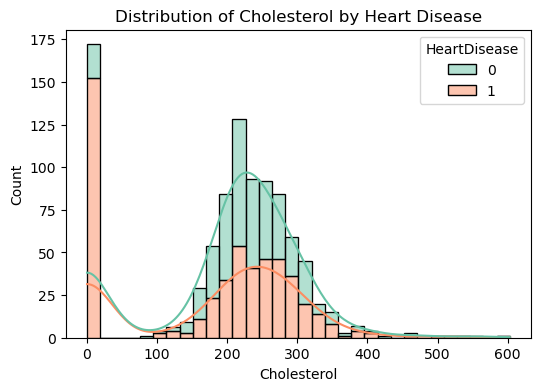

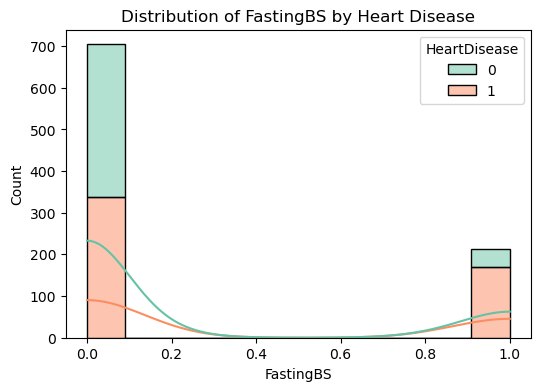

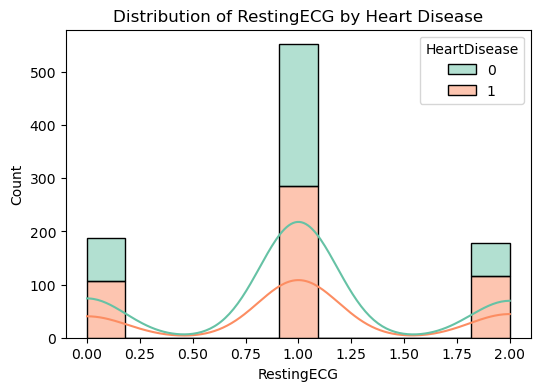

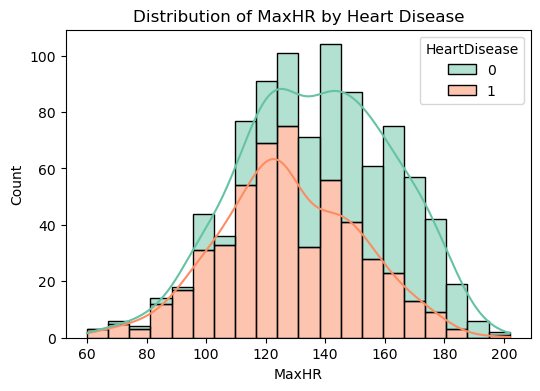

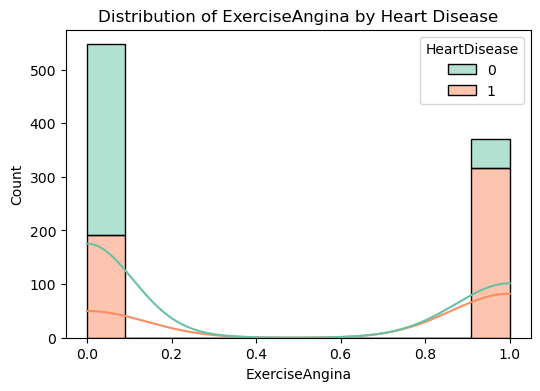

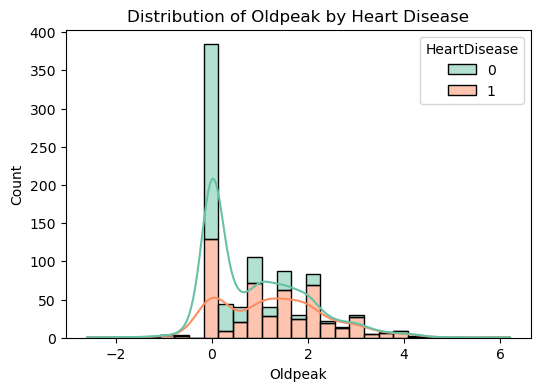

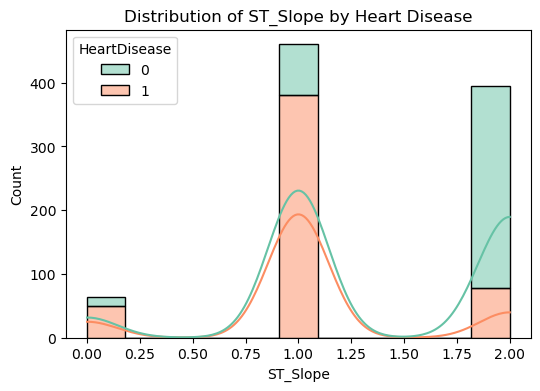

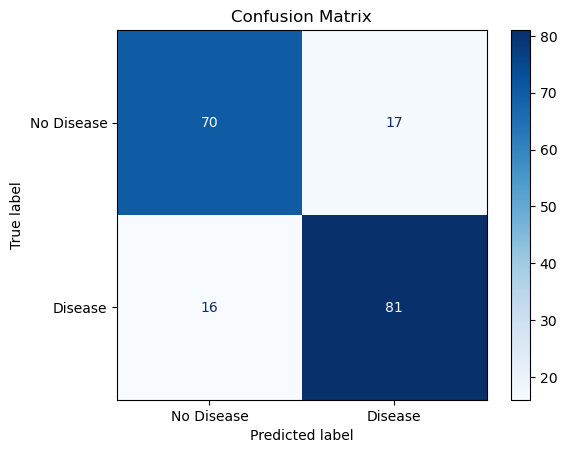

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df)
plt.title("Distribution of Heart Disease")
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features")
plt.show()

# 3. Feature Distributions by Target Variable
features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='HeartDisease', multiple="stack", palette="Set2", kde=True)
    plt.title(f"Distribution of {feature} by Heart Disease")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

# 4. Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
